In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px

In [ ]:
# 1. Tải dữ liệu từ file
uploaded = files.upload()
file_path = list(uploaded.keys())[0]  # Lấy tên file đã upload
df = pd.read_excel(file_path)

Saving ITBLogisticDataset.xlsx to ITBLogisticDataset.xlsx


# Mục lục


##1. Sales Report


##2. Delivery Report

##3. Customer Segment

##4. Late Delivery Analysis (1)

##5. Late Delivery Analysis (2)

##6. Late Delivery Analysis (3)

##7. Late Delivery Analysis (4)

#1. Sales Report

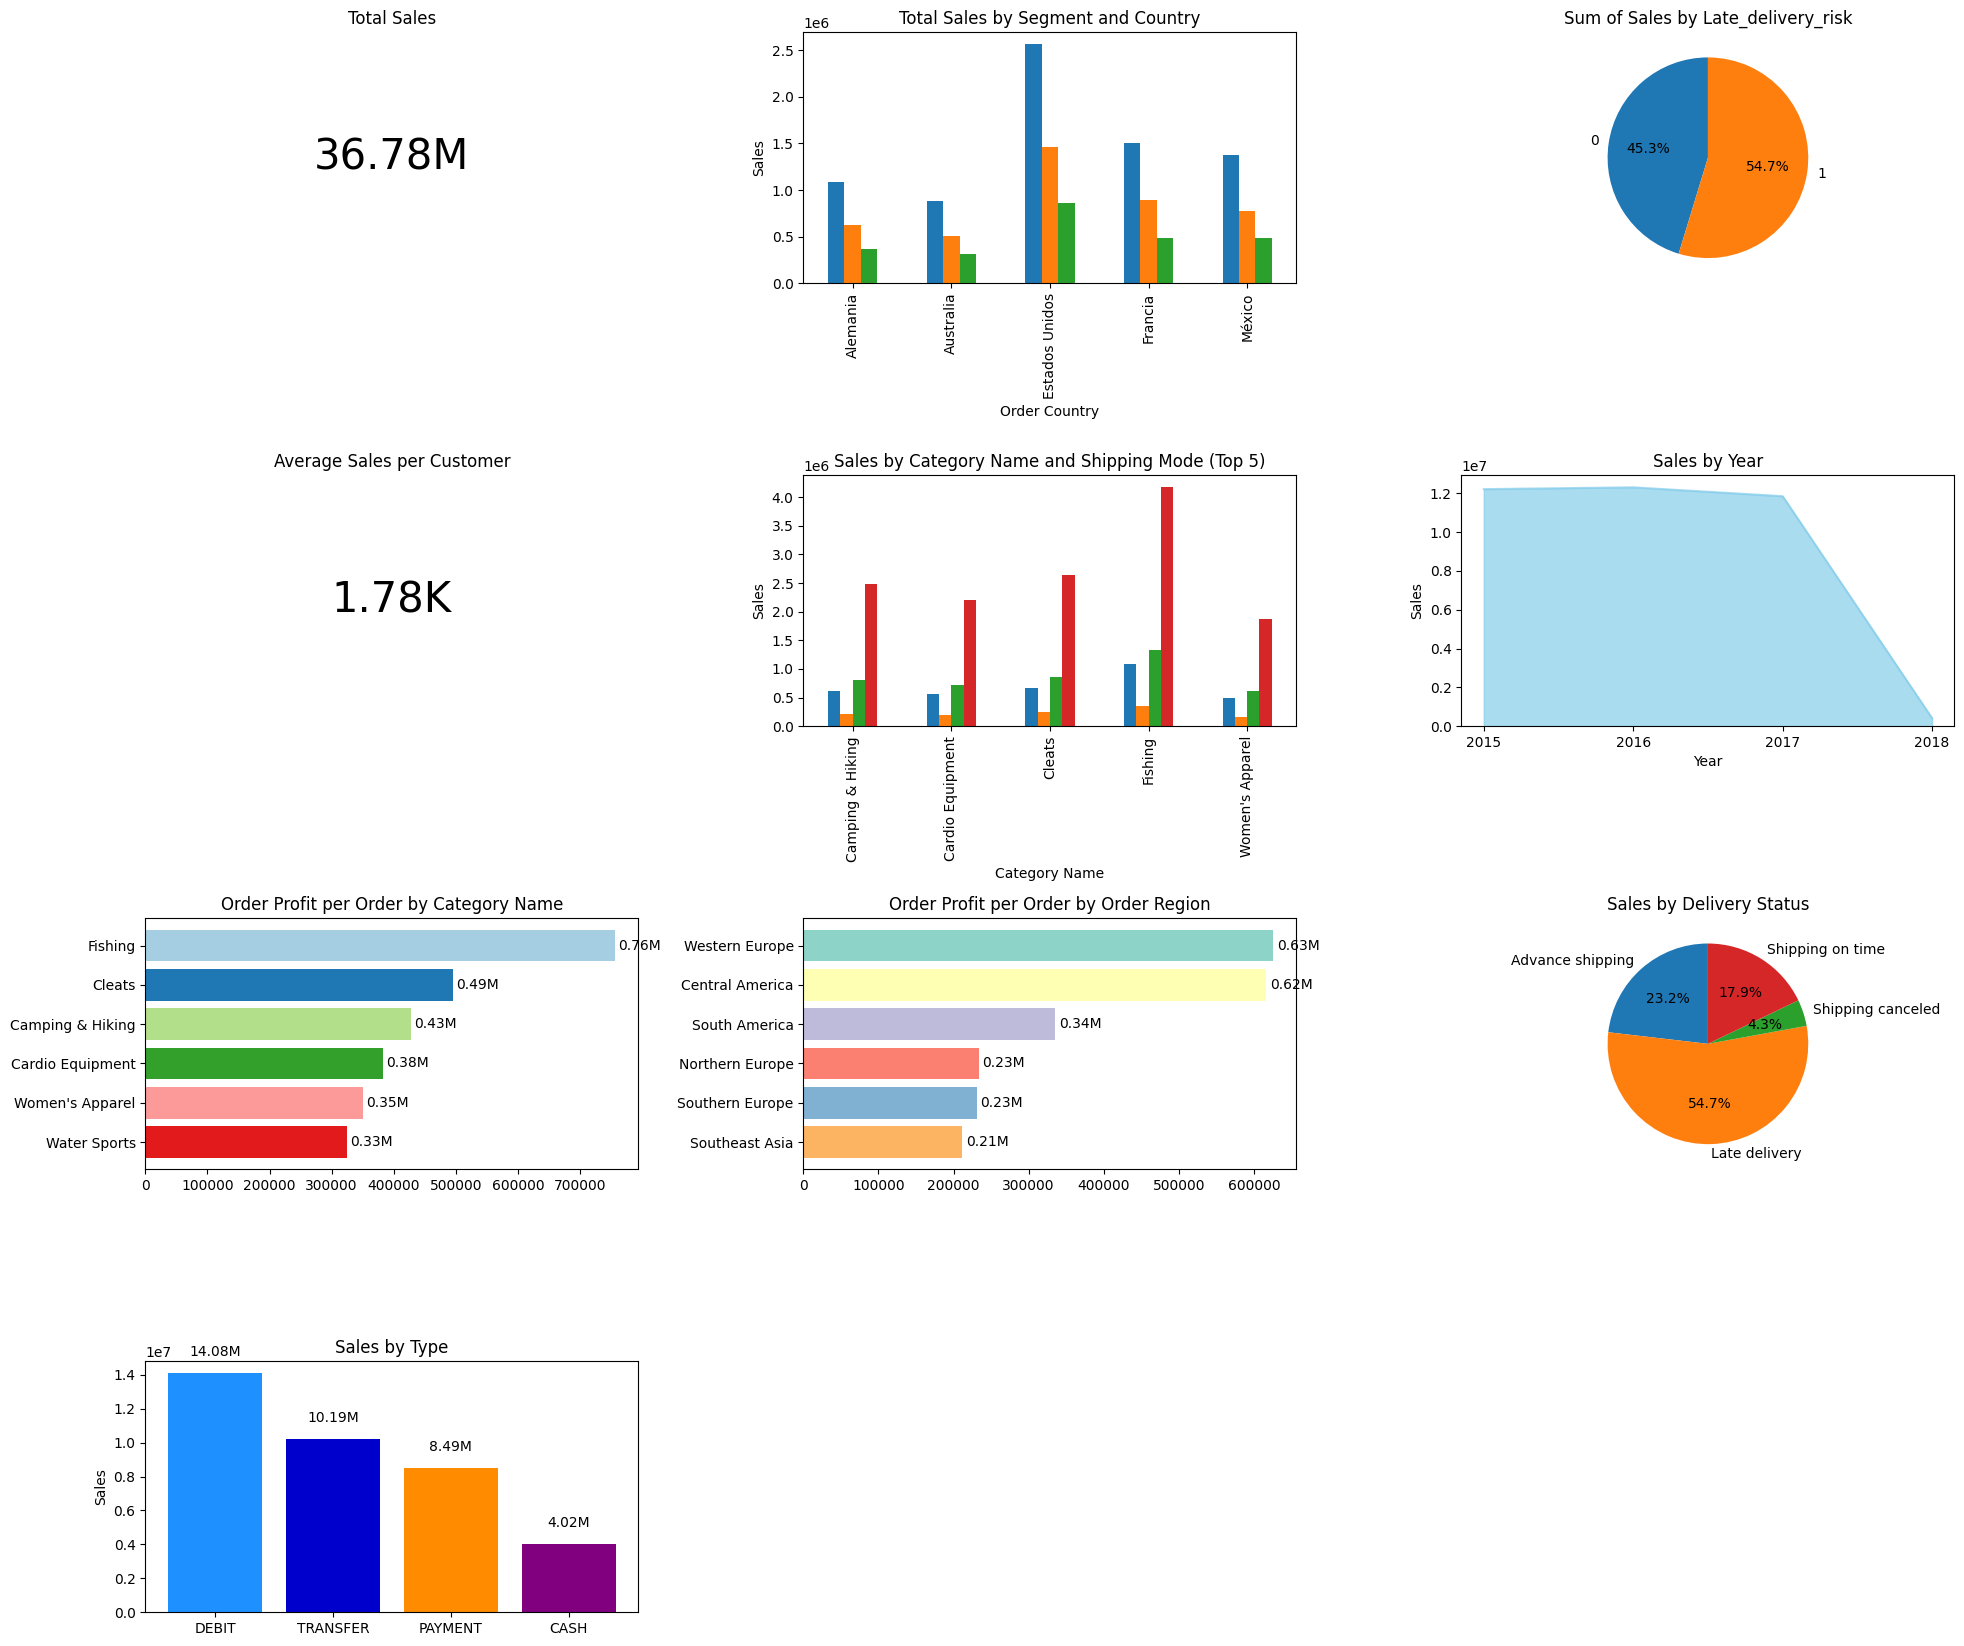

In [ ]:
total_sales = df['Sales'].sum()
avg_sales_per_customer = total_sales / df['Customer Id'].nunique()

top5_country = df.groupby('Order Country')['Sales'].sum().nlargest(5).index
filtered_df_country = df[df['Order Country'].isin(top5_country)]
sales_by_segment_country = filtered_df_country.groupby(['Order Country', 'Customer Segment'])['Sales'].sum().unstack().fillna(0)

top5_category = df.groupby('Category Name')['Sales'].sum().nlargest(5).index
filtered_df_category = df[df['Category Name'].isin(top5_category)]
sales_by_category_shipmode = filtered_df_category.groupby(['Category Name', 'Shipping Mode'])['Sales'].sum().unstack().fillna(0)

sales_by_late_risk = df.groupby('Late_delivery_risk')['Sales'].sum()
profit_by_category = df.groupby('Category Name')['Benefit per order'].sum().sort_values(ascending=False)
df['Year'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce').dt.year
sales_by_year = df.groupby('Year')['Sales'].sum()
sales_by_delivery_status = df.groupby('Delivery Status')['Sales'].sum()
sales_by_type = df.groupby('Type')['Sales'].sum()
profit_by_region = df.groupby('Order Region')['Benefit per order'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(4, 3, figsize=(20, 18))

axs[0, 0].text(0.5, 0.5, f"{total_sales/1e6:.2f}M", fontsize=30, ha='center', va='center')
axs[0, 0].set_title("Total Sales")
axs[0, 0].axis('off')

sales_by_segment_country.plot(kind='bar', ax=axs[0, 1], legend=False )
axs[0, 1].set_title("Total Sales by Segment and Country")
axs[0, 1].set_ylabel("Sales")

axs[0, 2].pie(sales_by_late_risk, labels=sales_by_late_risk.index, autopct='%1.1f%%', startangle=90)
axs[0, 2].set_title("Sum of Sales by Late_delivery_risk")

axs[1, 0].text(0.5, 0.5, f"{avg_sales_per_customer/1e3:.2f}K", fontsize=30, ha='center', va='center')
axs[1, 0].set_title("Average Sales per Customer")
axs[1, 0].axis('off')

sales_by_category_shipmode.plot(kind='bar', ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Sales by Category Name and Shipping Mode (Top 5)")
axs[1, 1].set_ylabel("Sales")

df['Year'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce').dt.year.astype('Int64')
sales_by_year = df.groupby('Year')['Sales'].sum()
sales_by_year.index = sales_by_year.index.astype(int)

sales_by_year.plot(kind='area', ax=axs[1, 2], color='skyblue', alpha=0.7)
axs[1, 2].set_title("Sales by Year")
axs[1, 2].set_xlabel("Year")
axs[1, 2].set_ylabel("Sales")
axs[1, 2].set_xticks(sales_by_year.index)

profit_sorted_category = profit_by_category.head(6).sort_values(ascending=False)
colors7 = plt.cm.Paired(range(len(profit_sorted_category)))
bars7 = axs[2, 0].barh(profit_sorted_category.index, profit_sorted_category.values, color=colors7)
for bar in bars7:
    axs[2, 0].text(bar.get_width() + 5000, bar.get_y() + bar.get_height()/2,
                   f"{bar.get_width()/1e6:.2f}M", va='center')
axs[2, 0].invert_yaxis()
axs[2, 0].set_title("Order Profit per Order by Category Name")

profit_sorted_region = profit_by_region.head(6).sort_values(ascending=False)
colors8 = plt.cm.Set3(range(len(profit_sorted_region)))
bars8 = axs[2, 1].barh(profit_sorted_region.index, profit_sorted_region.values, color=colors8)
for bar in bars8:
    axs[2, 1].text(bar.get_width() + 5000, bar.get_y() + bar.get_height()/2,
                   f"{bar.get_width()/1e6:.2f}M", va='center')
axs[2, 1].invert_yaxis()
axs[2, 1].set_title("Order Profit per Order by Order Region")

axs[2, 2].pie(sales_by_delivery_status, labels=sales_by_delivery_status.index, autopct='%1.1f%%', startangle=90)
axs[2, 2].set_title("Sales by Delivery Status")

sales_sorted_type = sales_by_type.sort_values(ascending=False)
colors10 = ['dodgerblue', 'mediumblue', 'darkorange', 'purple']
bars10 = axs[3, 0].bar(sales_sorted_type.index, sales_sorted_type.values, color=colors10)
for bar in bars10:
    axs[3, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1e6,
                   f"{bar.get_height()/1e6:.2f}M", ha='center', fontsize=10)
axs[3, 0].set_title("Sales by Type")
axs[3, 0].set_ylabel("Sales")

axs[3, 1].axis('off')
axs[3, 2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#2. Delivery Report

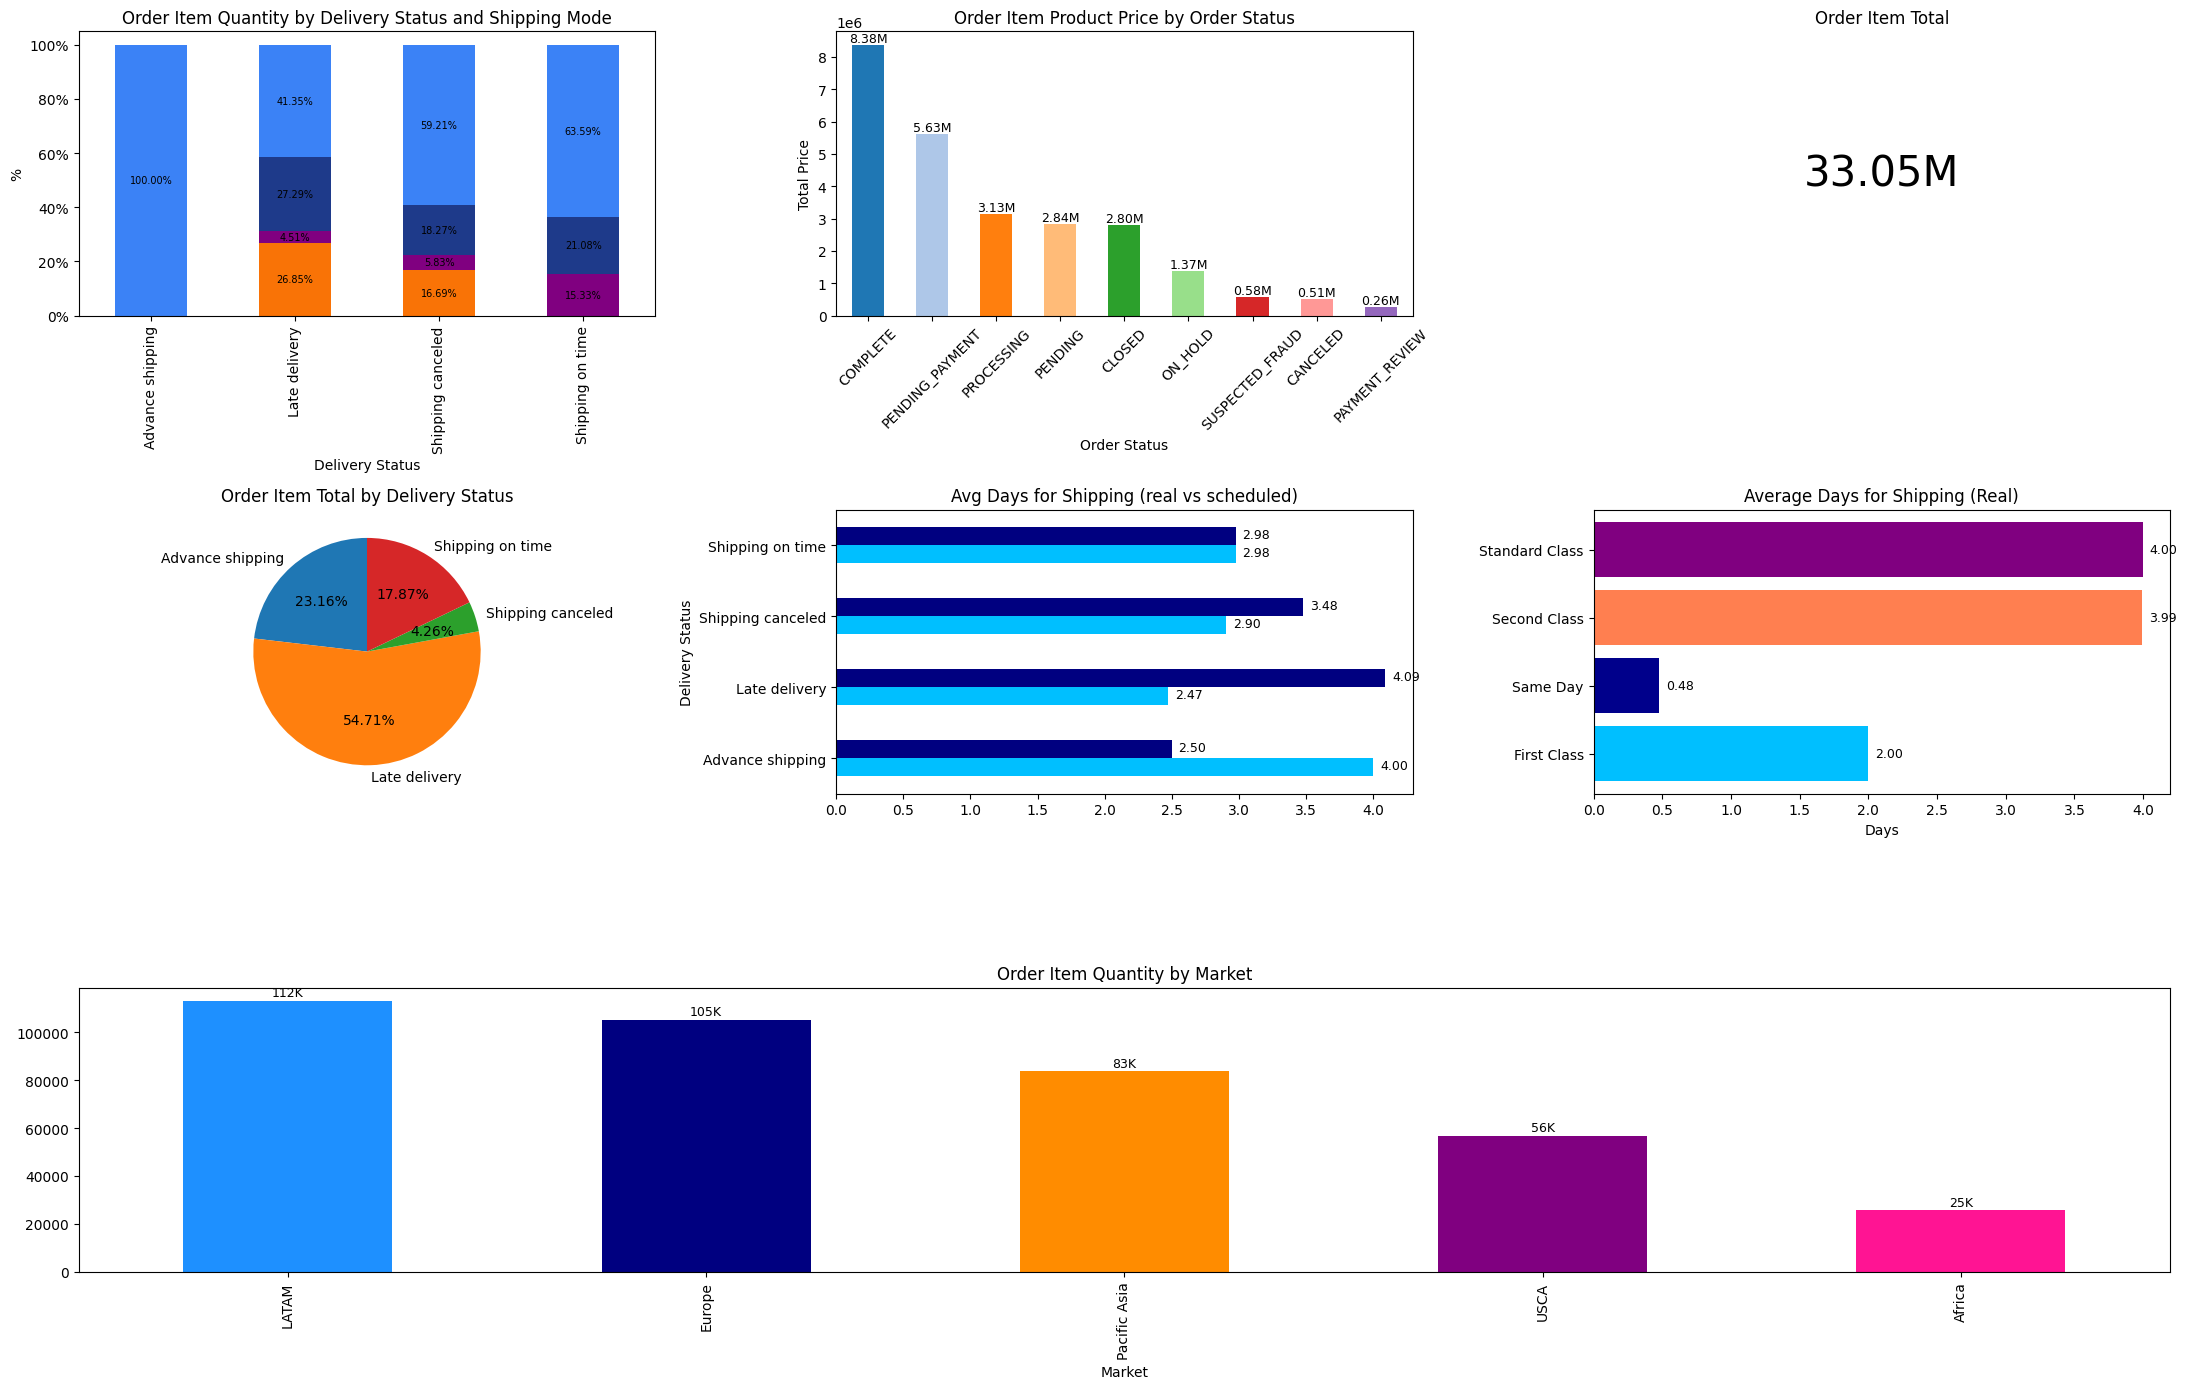

In [ ]:
df['Order Item Total'] = pd.to_numeric(df['Order Item Total'], errors='coerce')
df['Order Item Product Price'] = pd.to_numeric(df['Order Item Product Price'], errors='coerce')
df['Days for shipping (real)'] = pd.to_numeric(df['Days for shipping (real)'], errors='coerce')
df['Days for shipment (scheduled)'] = pd.to_numeric(df['Days for shipment (scheduled)'], errors='coerce')

pivot_delivery_shipmode = pd.crosstab(df['Delivery Status'], df['Shipping Mode'],
    values=df['Order Item Quantity'], aggfunc='sum', normalize='index') * 100
pivot_order_status_price = df.groupby('Order Status')['Order Item Product Price'].sum().sort_values(ascending=False)
pivot_shipping_mode_days = df.groupby('Shipping Mode')[['Days for shipment (scheduled)', 'Days for shipping (real)']].mean()
pivot_delivery_avg_days = df.groupby('Delivery Status')[['Days for shipment (scheduled)', 'Days for shipping (real)']].mean()
pivot_market_quantity = df.groupby('Market')['Order Item Quantity'].sum().sort_values(ascending=False)
pie_delivery_status = df.groupby('Delivery Status')['Order Item Total'].sum()
total_order_item = df['Order Item Total'].sum()

fig = plt.figure(figsize=(22, 14))
gs = gridspec.GridSpec(3, 3, figure=fig, height_ratios=[2, 2, 2])

custom_colors = ['#f97306', '#800080', '#1e3a8a', '#3b82f6']
percent_df = pivot_delivery_shipmode.div(pivot_delivery_shipmode.sum(axis=1), axis=0) * 100
ax1 = fig.add_subplot(gs[0, 0])
percent_df.plot(kind='bar', stacked=True, ax=ax1, color=custom_colors, legend = False)
ax1.set_title('Order Item Quantity by Delivery Status and Shipping Mode')
ax1.set_ylabel('%')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
for i, row in enumerate(percent_df.values):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:
            ax1.text(i, cum_height + val / 2, f'{val:.2f}%', ha='center', va='center', fontsize=7)
            cum_height += val

series_price = pivot_order_status_price.squeeze()
colors = plt.cm.tab20.colors[:len(series_price)]
ax2 = fig.add_subplot(gs[0, 1])
series_price.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Order Item Product Price by Order Status')
ax2.set_ylabel('Total Price')
ax2.set_xlabel('Order Status')
ax2.tick_params(axis='x', rotation=45)
for idx, val in enumerate(series_price.values):
    ax2.text(idx, val, f"{val/1e6:.2f}M", ha='center', va='bottom', fontsize=9)

ax3 = fig.add_subplot(gs[0, 2])
ax3.text(0.5, 0.5, f"{total_order_item/1e6:.2f}M", fontsize=30, ha='center', va='center')
ax3.set_title("Order Item Total")
ax3.axis('off')

ax4 = fig.add_subplot(gs[1, 0])
ax4.pie(pie_delivery_status, labels=pie_delivery_status.index, autopct='%1.2f%%', startangle=90)
ax4.set_title("Order Item Total by Delivery Status")

ax5 = fig.add_subplot(gs[1, 1])
pivot_delivery_avg_days.plot(kind='barh', ax=ax5, color=['deepskyblue', 'navy'], legend = False)
ax5.set_title("Avg Days for Shipping (real vs scheduled)")
for i in ax5.patches:
    ax5.text(i.get_width() + 0.05, i.get_y() + 0.1, f"{i.get_width():.2f}", fontsize=9)

ax6 = fig.add_subplot(gs[1, 2])
pivot_real_only = pivot_shipping_mode_days[['Days for shipping (real)']]
pivot_real_only = pivot_real_only.reset_index()
colors = ['deepskyblue', 'darkblue', 'coral', 'purple']
for i, (mode, value) in enumerate(zip(pivot_real_only['Shipping Mode'], pivot_real_only['Days for shipping (real)'])):
    ax6.barh(mode, value, color=colors[i])
    ax6.text(value + 0.05, i, f"{value:.2f}", va='center', fontsize=9)
ax6.set_title("Average Days for Shipping (Real)")
ax6.set_xlabel("Days")
ax6.set_ylabel("")

ax7 = fig.add_subplot(gs[2, :])
pivot_market_quantity.plot(kind='bar', ax=ax7, color=['dodgerblue', 'navy', 'darkorange', 'purple', 'deeppink'])
ax7.set_title("Order Item Quantity by Market")
for idx, val in enumerate(pivot_market_quantity.values):
    ax7.text(idx, val + 2000, f"{int(val/1000)}K", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

#3. Customer Segment

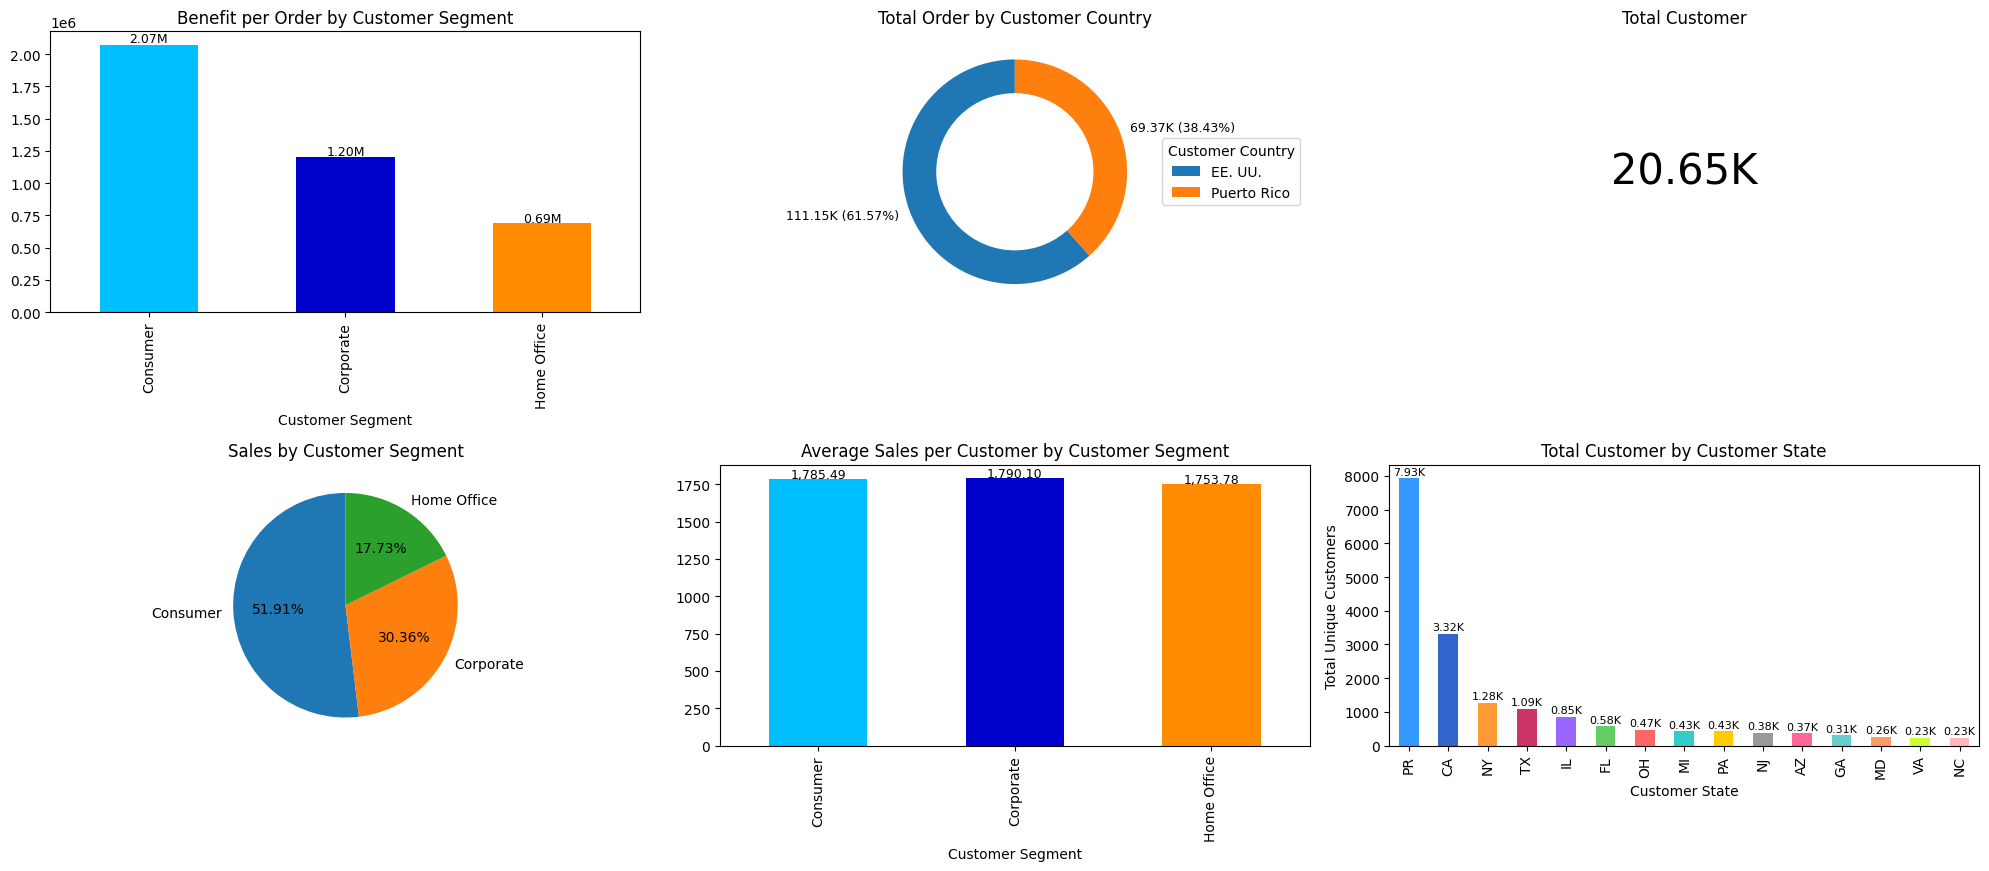

In [ ]:
benefit_by_segment = df.groupby('Customer Segment')['Benefit per order'].sum().sort_values(ascending=False)
sales_by_segment = df.groupby('Customer Segment')['Sales'].sum()
avg_sales_per_segment = df.groupby('Customer Segment').agg({
    'Sales': 'sum',
    'Customer Id': pd.Series.nunique
})
avg_sales_per_segment['Average Sales per Customer'] = avg_sales_per_segment['Sales'] / avg_sales_per_segment['Customer Id']
avg_sales_per_segment = avg_sales_per_segment['Average Sales per Customer']
total_order_country = df['Customer Country'].value_counts()
total_customer = df['Customer Id'].nunique()
customer_by_state = df.groupby('Customer State')['Customer Id'].nunique().sort_values(ascending=False).head(15)
sales_by_product = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(3, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
colors = ['deepskyblue', 'mediumblue', 'darkorange']
benefit_by_segment.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title("Benefit per Order by Customer Segment")
for idx, val in enumerate(benefit_by_segment.values):
    ax1.text(idx, val + 0.01 * val, f"{val/1e6:.2f}M", ha='center', fontsize=9)

ax2 = fig.add_subplot(gs[0, 1])
labels = [f'{v:,.2f}K ({p:.2f}%)' for v, p in zip(
    total_order_country.values / 1000,
    total_order_country.values / total_order_country.values.sum() * 100
)]
wedges, texts = ax2.pie(
    total_order_country,
    labels=labels,
    startangle=90,
    pctdistance=0.85,
    textprops={'fontsize': 9}
)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax2.legend(
    wedges,
    total_order_country.index,
    title="Customer Country",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)
ax2.set_title("Total Order by Customer Country")

ax3 = fig.add_subplot(gs[0, 2])
ax3.text(0.5, 0.5, f"{total_customer/1e3:.2f}K", fontsize=30, ha='center', va='center')
ax3.set_title("Total Customer")
ax3.axis('off')

ax4 = fig.add_subplot(gs[1, 0])
ax4.pie(sales_by_segment, labels=sales_by_segment.index, autopct='%1.2f%%', startangle=90)
ax4.set_title("Sales by Customer Segment")

ax5 = fig.add_subplot(gs[1, 1])
avg_sales_per_segment.plot(kind='bar', ax=ax5, color=colors)
ax5.set_title("Average Sales per Customer by Customer Segment")
for idx, val in enumerate(avg_sales_per_segment.values):
    ax5.text(idx, val + 5, f"{val:,.2f}", ha='center', fontsize=9)

colors = [
    '#3399FF', '#3366CC', '#FF9933', '#CC3366', '#9966FF',
    '#66CC66', '#FF6666', '#33CCCC', '#FFCC00', '#999999',
    '#FF6699', '#66CCCC', '#FF9966', '#CCFF33', '#FFB6C1'
]
ax6 = fig.add_subplot(gs[1, 2])
bars = customer_by_state.plot(kind='bar', ax=ax6, color=colors)
ax6.set_title("Total Customer by Customer State")
for idx, val in enumerate(customer_by_state.values):
    ax6.text(idx, val + 100, f"{val/1e3:.2f}K", ha='center', fontsize=8)
ax6.set_xlabel("Customer State")
ax6.set_ylabel("Total Unique Customers")
ax6.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#4. Late Delivery Analysis (1)

<ipython-input-7-4711e13f52a0>:98: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



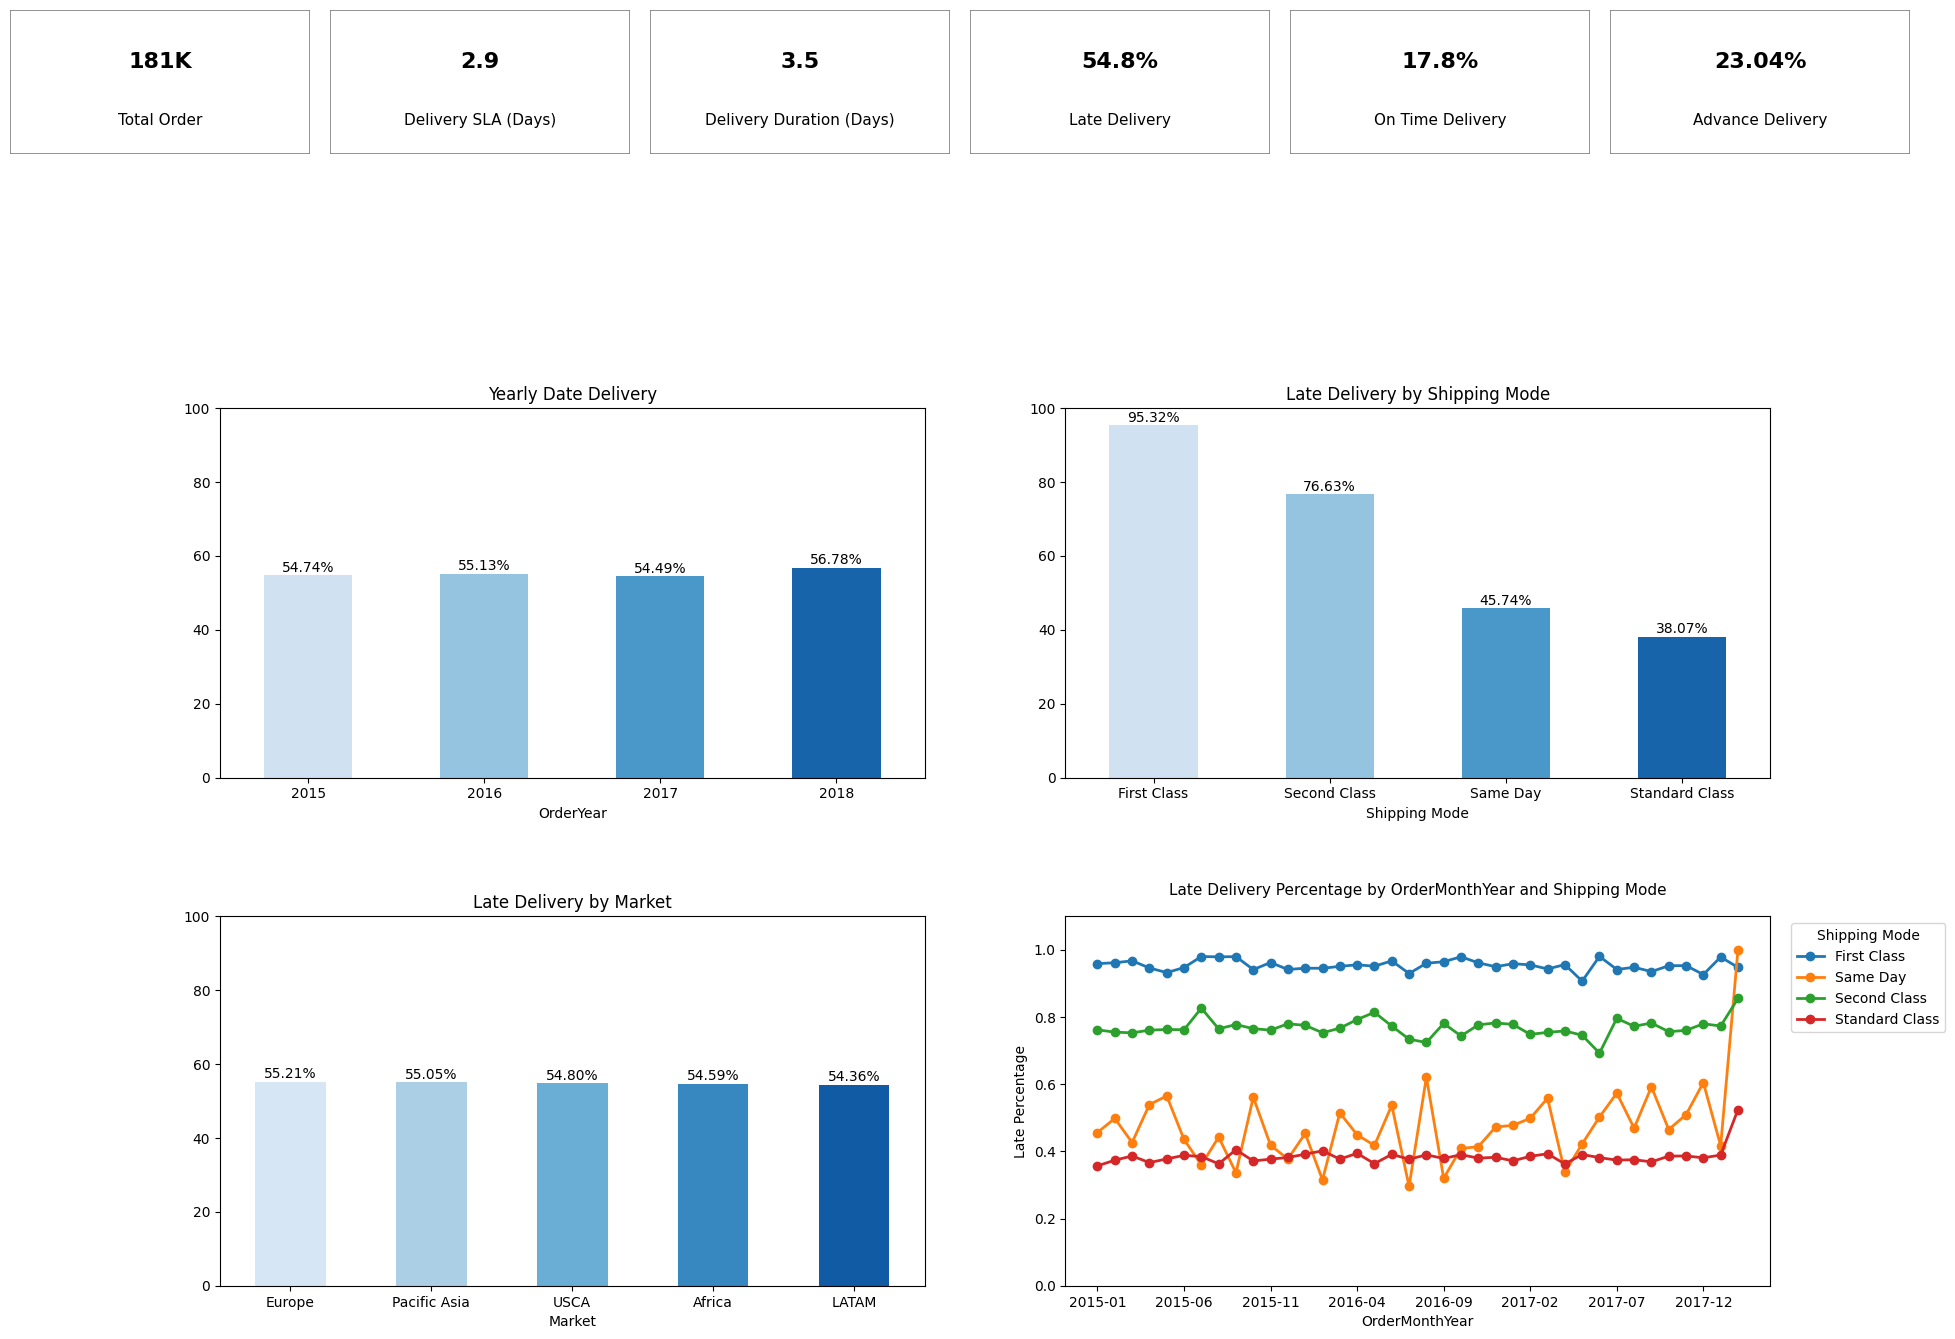

In [ ]:
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])
df['OrderYear'] = df['shipping date (DateOrders)'].dt.year
df['OrderMonthYear'] = df['shipping date (DateOrders)'].dt.to_period('M').astype(str)

total_order = len(df)
avg_sla = df['Days for shipment (scheduled)'].mean()
avg_duration = df['Days for shipping (real)'].mean()

status_counts = df['Delivery Status'].value_counts(normalize=True) * 100
late = status_counts.get('Late delivery', 0)
on_time = status_counts.get('Shipping on time', 0)
advance = status_counts.get('Advance shipping', 0)

yearly_late = df[df['Delivery Status'] == 'Late delivery'].groupby('OrderYear').size() / df.groupby('OrderYear').size() * 100

late_by_shipmode = df[df['Delivery Status'] == 'Late delivery'].groupby('Shipping Mode').size() / df.groupby('Shipping Mode').size() * 100

late_by_market = df[df['Delivery Status'] == 'Late delivery'].groupby('Market').size() / df.groupby('Market').size() * 100

total_by_month_mode = df.groupby(['OrderMonthYear', 'Shipping Mode']).size()
late_by_month_mode = df[df['Delivery Status'] == 'Late delivery'].groupby(['OrderMonthYear', 'Shipping Mode']).size()
monthly_mode = (late_by_month_mode / total_by_month_mode).fillna(0)

fig = plt.figure(figsize=(20, 18))
gs = gridspec.GridSpec(6, 4, figure=fig, hspace=1.2, wspace=0.5)

kpi_values = [f"{total_order/1e3:.0f}K", f"{avg_sla:.1f}", f"{avg_duration:.1f}",
              f"{late:.1f}%", f"{on_time:.1f}%", f"{advance:.2f}%"]
kpi_titles = ["Total Order", "Delivery SLA (Days)", "Delivery Duration (Days)",
              "Late Delivery", "On Time Delivery", "Advance Delivery"]

for i in range(6):
    x = 0.02 + (i * 0.16)
    y = 0.88
    ax = fig.add_axes([x, y, 0.15, 0.08])
    ax.axis('off')
    rect = patches.Rectangle((0, 0), 1, 1, linewidth=1.2, edgecolor='gray', facecolor='none')
    ax.add_patch(rect)
    ax.text(0.5, 0.6, kpi_values[i], fontsize=16, ha='center', fontweight='bold')
    ax.text(0.5, 0.2, kpi_titles[i], fontsize=11, ha='center')

ax1 = fig.add_subplot(gs[1:3, 0:2])
yearly_late.plot(kind='bar', ax=ax1, color=sns.color_palette("Blues", len(yearly_late)))
ax1.set_title("Yearly Date Delivery")
ax1.set_ylim(0, 100)
ax1.tick_params(axis='x', rotation=0)
for idx, val in enumerate(yearly_late.values):
    ax1.text(idx, val + 1, f"{val:.2f}%", ha='center')

ax2 = fig.add_subplot(gs[1:3, 2:4])
late_by_shipmode = late_by_shipmode.sort_values(ascending=False)
late_by_shipmode.plot(kind='bar', ax=ax2, color=sns.color_palette("Blues", len(late_by_shipmode)))
ax2.set_title("Late Delivery by Shipping Mode")
ax2.set_ylim(0, 100)
ax2.tick_params(axis='x', rotation=0)
for idx, val in enumerate(late_by_shipmode.values):
    ax2.text(idx, val + 1, f"{val:.2f}%", ha='center')

ax3 = fig.add_subplot(gs[3:5, 0:2])
late_by_market = late_by_market.sort_values(ascending=False)
late_by_market.plot(kind='bar', ax=ax3, color=sns.color_palette("Blues", len(late_by_market)))
ax3.set_title("Late Delivery by Market")
ax3.set_ylim(0, 100)
ax3.tick_params(axis='x', rotation=0)
for idx, val in enumerate(late_by_market.values):
    ax3.text(idx, val + 1, f"{val:.2f}%", ha='center')

ax4 = fig.add_subplot(gs[3:5, 2:4])
monthly_mode = monthly_mode.unstack()
monthly_mode.plot(ax=ax4, linewidth=2, marker='o')
ax4.set_title("Late Delivery Percentage by OrderMonthYear and Shipping Mode", fontsize=11, pad=15)
ax4.set_ylabel("Late Percentage")
ax4.set_ylim(0, 1.1)
ax4.tick_params(axis='x', rotation=0)
ax4.legend(title="Shipping Mode", bbox_to_anchor=(1.02, 1), loc='upper left')

map_data = df.groupby('Order Country').agg({
    'Longitude': 'mean',
    'Latitude': 'mean',
    'Days for shipment (scheduled)': 'mean',
    'Delivery Status': lambda x: (x == 'Late delivery').mean() * 100
}).reset_index().rename(columns={
    'Days for shipment (scheduled)': 'Avg SLA',
    'Delivery Status': 'Late Delivery %'
})

fig_map = px.scatter_geo(
    map_data,
    lat='Latitude',
    lon='Longitude',
    hover_name='Order Country',
    size='Late Delivery %',
    color='Avg SLA',
    projection='natural earth',
    hover_data={'Avg SLA': ':.2f', 'Late Delivery %': ':.2f'}
)

plt.tight_layout()
plt.show()
fig_map.show()

#4. Late Delivery Analysis (2)

<ipython-input-8-53306c3ab8dc>:21: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-8-53306c3ab8dc>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-8-53306c3ab8dc>:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-8-53306c3ab8dc>:65: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



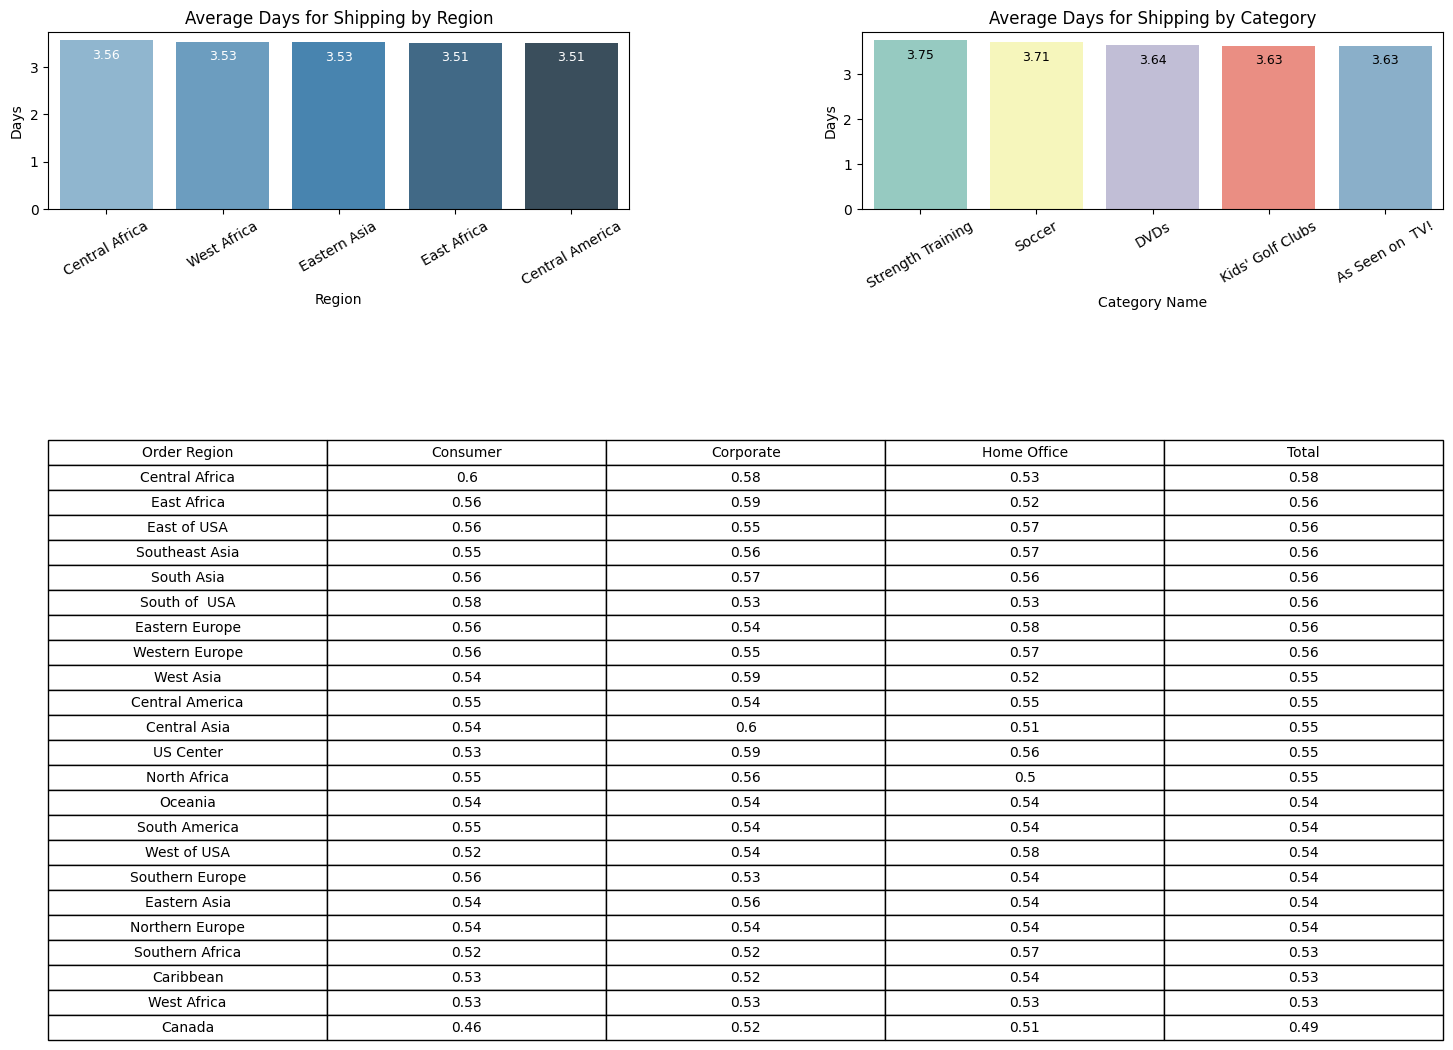

In [ ]:
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])
df['OrderYear'] = df['shipping date (DateOrders)'].dt.year
df['OrderMonthYear'] = df['shipping date (DateOrders)'].dt.to_period('M').astype(str)

avg_shipping_by_region = df.groupby('Order Region')['Days for shipping (real)'].mean().sort_values(ascending=False).head(5)
avg_shipping_by_category = df.groupby('Category Name')['Days for shipping (real)'].mean().sort_values(ascending=False).head(5)

late_df = df[df['Delivery Status'] == 'Late delivery']
late_orders_by_category = late_df['Category Name'].value_counts().head(20)
treemap_data = late_orders_by_category.reset_index()
treemap_data.columns = ['Category Name', 'Late Orders']

region_segment_late = pd.pivot_table(
    df.assign(Late=df['Delivery Status'] == 'Late delivery'),
    index='Order Region',
    columns='Customer Segment',
    values='Late',
    aggfunc='mean'
).round(2)

region_segment_late['Total'] = df.groupby('Order Region').apply(
    lambda x: (x['Delivery Status'] == 'Late delivery').mean()
).round(2)

region_segment_late = region_segment_late.fillna(0).sort_values(by='Total', ascending=False)
region_segment_late_reset = region_segment_late.reset_index()

fig = plt.figure(figsize=(18, 11))
gs = gridspec.GridSpec(4, 2, figure=fig, height_ratios=[1.4, 0.2, 0.2, 2.2], hspace=0.9, wspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(x=avg_shipping_by_region.index, y=avg_shipping_by_region.values, ax=ax1, palette='Blues_d')
ax1.set_title("Average Days for Shipping by Region", fontsize=12)
ax1.set_ylabel("Days")
ax1.set_xlabel("Region")
ax1.tick_params(axis='x', rotation=30)
for i, v in enumerate(avg_shipping_by_region.values):
    ax1.text(i, v * 0.95, f"{v:.2f}", ha='center', va='top', fontsize=9, color='white')

ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(x=avg_shipping_by_category.index, y=avg_shipping_by_category.values, ax=ax2, palette='Set3')
ax2.set_title("Average Days for Shipping by Category", fontsize=12)
ax2.set_ylabel("Days")
ax2.set_xlabel("Category Name")
ax2.tick_params(axis='x', rotation=30)
for i, v in enumerate(avg_shipping_by_category.values):
    ax2.text(i, v * 0.95, f"{v:.2f}", ha='center', va='top', fontsize=9)

fig.add_subplot(gs[1, :]).axis('off')
fig.add_subplot(gs[2, :]).axis('off')

ax3 = fig.add_subplot(gs[3, :])
ax3.axis('off')
table = ax3.table(
    cellText=region_segment_late_reset.values,
    colLabels=region_segment_late_reset.columns,
    loc='center',
    cellLoc='center',
    colLoc='center'
)
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

fig_treemap = px.treemap(
    treemap_data,
    path=['Category Name'],
    values='Late Orders',
    title="Total Orders by Category with the Most Late Deliveries",
    hover_data={'Late Orders': True},
)

fig_treemap.update_traces(textinfo='label+value')
fig_treemap.show()

#4. Late Delivery Analysis (3)

<ipython-input-9-d1e4070a0e79>:84: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



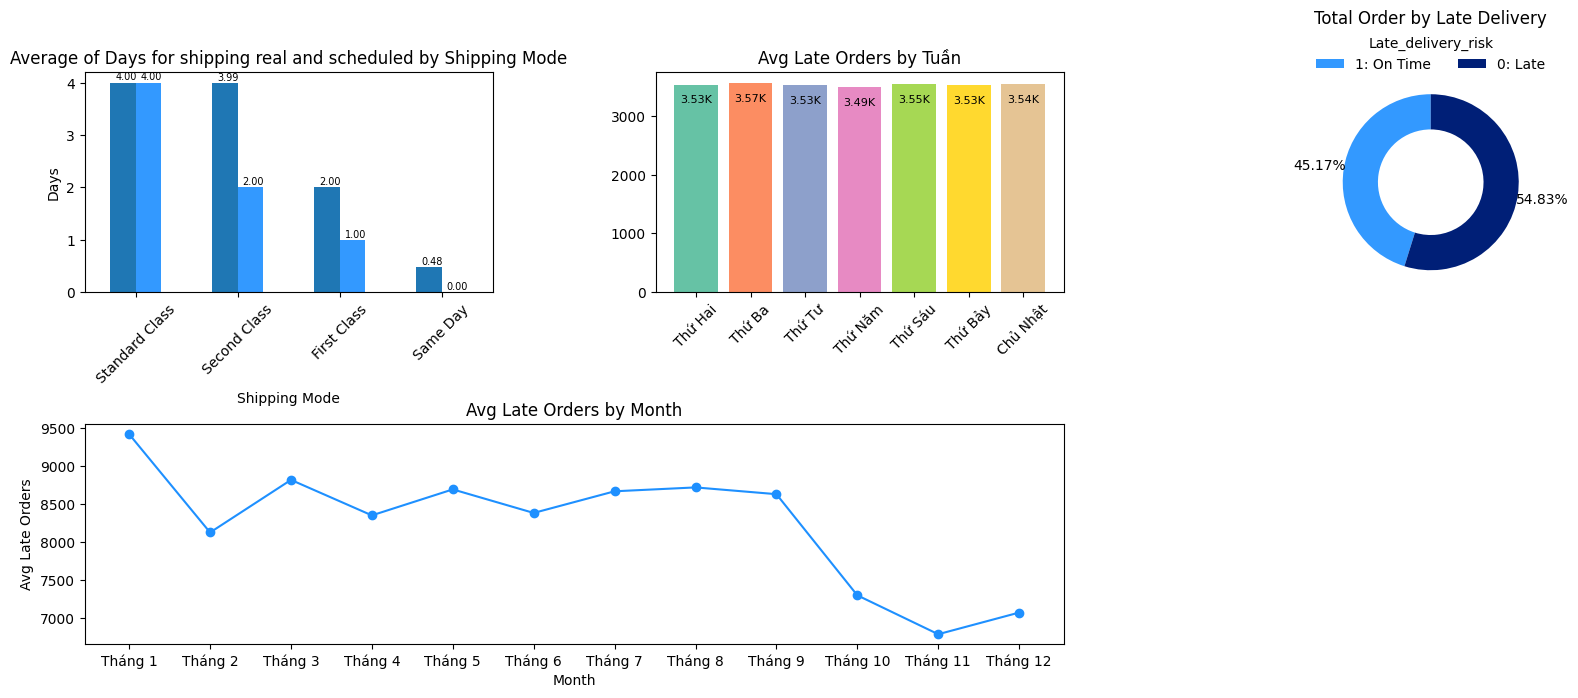

In [ ]:
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])
df['shipping_dayofweek'] = df['shipping date (DateOrders)'].dt.dayofweek
dow_map = {0: 'Thứ Hai', 1: 'Thứ Ba', 2: 'Thứ Tư', 3: 'Thứ Năm', 4: 'Thứ Sáu', 5: 'Thứ Bảy', 6: 'Chủ Nhật'}
df['Day Name'] = df['shipping_dayofweek'].map(dow_map)
df['Month'] = df['shipping date (DateOrders)'].dt.month
df['Late_delivery_risk'] = df['Delivery Status'].apply(lambda x: 1 if x == 'Late delivery' else 0)

shipping_avg = df.groupby('Shipping Mode')[['Days for shipping (real)', 'Days for shipment (scheduled)']].mean().round(2)
n_years = df['OrderYear'].nunique()
num_years = df['OrderYear'].nunique()
dow_order = ['Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu', 'Thứ Bảy', 'Chủ Nhật']
avg_late_by_dow = (
    df[df['Delivery Status'] == 'Late delivery']
    .groupby('Day Name')
    .size()
    .div(num_years)
    .reindex(dow_order)
    .round(2)
)
late_by_month = df[df['Delivery Status'] == 'Late delivery'].groupby('Month').size()
late_risk = df['Late_delivery_risk'].value_counts(normalize=True).round(4)

fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.6, wspace=0.4)

shipping_avg_sorted = shipping_avg.sort_values(by='Days for shipping (real)', ascending=False)
ax1 = fig.add_subplot(gs[0, 0])
shipping_avg_sorted.plot(kind='bar', ax=ax1, color=['#1f77b4', '#3399ff'])
ax1.set_title("Average of Days for shipping real and scheduled by Shipping Mode")
ax1.set_ylabel("Days")
ax1.legend().set_visible(False)
ax1.tick_params(axis='x', labelrotation=45)
for i, row in enumerate(shipping_avg_sorted.itertuples()):
    ax1.text(i - 0.2, row._1 + 0.05, f"{row._1:.2f}", color='black', fontsize=7)
    ax1.text(i + 0.05, row._2 + 0.05, f"{row._2:.2f}", color='black', fontsize=7)

ax2 = fig.add_subplot(gs[0, 1])
colors = sns.color_palette("Set2", len(avg_late_by_dow))
bars = ax2.bar(avg_late_by_dow.index, avg_late_by_dow.values, color=colors)
ax2.tick_params(axis='x', labelrotation=45)
for bar in bars:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.95,
        f"{height / 1000:.2f}K",
        ha='center', va='top',
        fontsize=8, color='black'
    )
ax2.set_title("Avg Late Orders by Tuần")

ax3 = fig.add_subplot(gs[1, :2])
late_by_month.plot(kind='line', marker='o', ax=ax3, color='dodgerblue')
ax3.set_title("Avg Late Orders by Month")
ax3.set_ylabel("Avg Late Orders")
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels([f"Tháng {i}" for i in range(1, 13)])

ax4 = fig.add_subplot(gs[0, 2])
sizes = [late_risk.get(0, 0) * 100, late_risk.get(1, 0) * 100]
colors = ['#3399ff', '#001f77']

wedges, texts, autotexts = ax4.pie(
    sizes,
    autopct='%1.2f%%',
    pctdistance=1.28,
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

ax4.set_title("Total Order by Late Delivery", pad=35)

ax4.legend(
    wedges,
    ["1: On Time", "0: Late"],
    title="Late_delivery_risk",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.22),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()

#4. Late Delivery Analysis (4)

<ipython-input-10-4b0d6b50bd5c>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-10-4b0d6b50bd5c>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-10-4b0d6b50bd5c>:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-10-4b0d6b50bd5c>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-10-4b0d6b50bd5c>:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `h

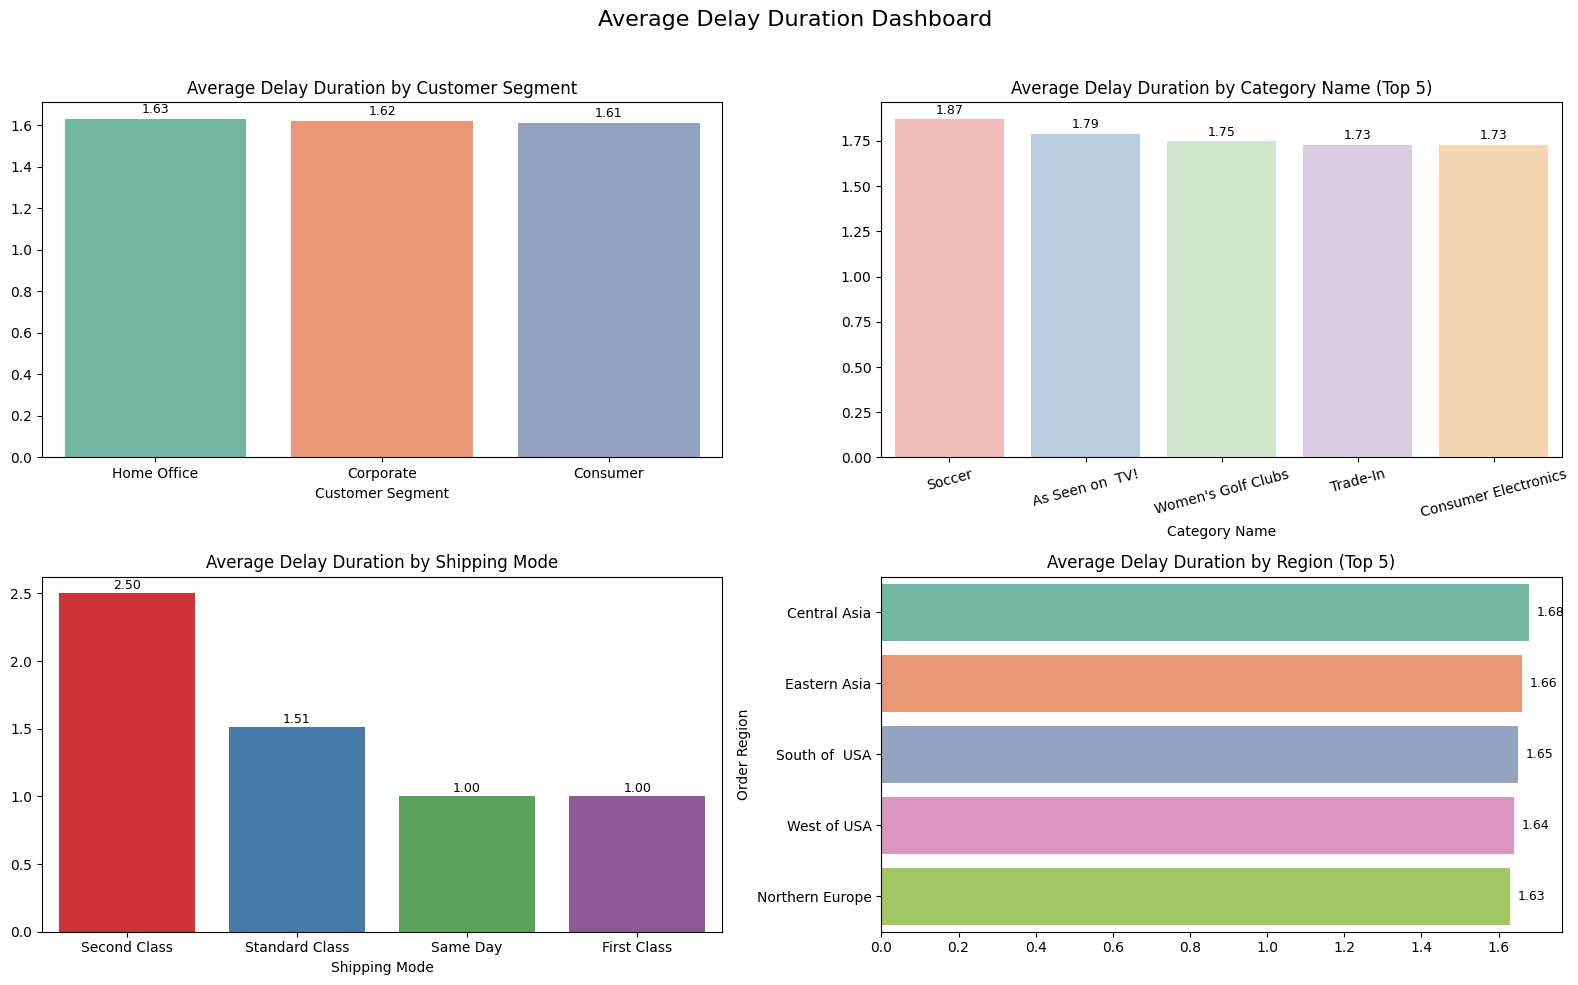

In [ ]:
df['Delay Duration'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

late_df = df[df['Delivery Status'] == 'Late delivery']

by_segment = late_df.groupby('Customer Segment')['Delay Duration'].mean().round(2)
by_shipping = late_df.groupby('Shipping Mode')['Delay Duration'].mean().round(2)
by_category = late_df.groupby('Category Name')['Delay Duration'].mean().round(2).sort_values(ascending=False).head(5)
by_region = late_df.groupby('Order Region')['Delay Duration'].mean().round(2).sort_values(ascending=False).head(5)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Average Delay Duration Dashboard", fontsize=16)

by_segment_sorted = by_segment.sort_values(ascending=False)
sns.barplot(x=by_segment_sorted.index, y=by_segment_sorted.values, ax=axs[0, 0], palette='Set2')
axs[0, 0].set_title("Average Delay Duration by Customer Segment")
for i, val in enumerate(by_segment_sorted.values):
    axs[0, 0].text(i, val + 0.03, f"{val:.2f}", ha='center', fontsize=9)

sns.barplot(x=by_category.index, y=by_category.values, ax=axs[0, 1], palette='Pastel1')
axs[0, 1].set_title("Average Delay Duration by Category Name (Top 5)")
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=15)
for i, val in enumerate(by_category.values):
    axs[0, 1].text(i, val + 0.03, f"{val:.2f}", ha='center', fontsize=9)

by_shipping_sorted = by_shipping.sort_values(ascending=False)
sns.barplot(x=by_shipping_sorted.index, y=by_shipping_sorted.values, ax=axs[1, 0], palette='Set1')
axs[1, 0].set_title("Average Delay Duration by Shipping Mode")
for i, val in enumerate(by_shipping_sorted.values):
    axs[1, 0].text(i, val + 0.03, f"{val:.2f}", ha='center', fontsize=9)

sns.barplot(y=by_region.index, x=by_region.values, ax=axs[1, 1], palette='Set2')
axs[1, 1].set_title("Average Delay Duration by Region (Top 5)")
for i, val in enumerate(by_region.values):
    axs[1, 1].text(val + 0.02, i, f"{val:.2f}", va='center', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()